In [1]:
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.datasets import imdb
from keras.preprocessing import sequence
from contextlib import redirect_stdout
from pathlib import Path
import time
start_time = time.time()

In [3]:
results_dir = Path('results').joinpath('model_1')
results_dir.mkdir(parents=True, exist_ok=True)

In [4]:
max_features = 10000
max_len = 500
print('Loading data ...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen = max_len)
x_test = sequence.pad_sequences(x_test, maxlen = max_len)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data ...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 500)
x_test shape: (25000, 500)


In [5]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 128)          1280000   
_________________________________________________________________
conv1d (Conv1D)              (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 98, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Tota

In [6]:
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy',metrics=['acc'])
history = model.fit(x_train, y_train, epochs=10, batch_size=128,validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
19968/20000 [============================>.] - ETA: 0s - loss: 0.7256 - acc: 0.5270

/opt/conda/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


20000/20000 [==============================] - 10s 490us/sample - loss: 0.7255 - acc: 0.5272 - val_loss: 0.6845 - val_acc: 0.5802
Epoch 2/10
20000/20000 [==============================] - 11s 533us/sample - loss: 0.6626 - acc: 0.6740 - val_loss: 0.6656 - val_acc: 0.5954
Epoch 3/10
20000/20000 [==============================] - 10s 484us/sample - loss: 0.6167 - acc: 0.7633 - val_loss: 0.6083 - val_acc: 0.7454
Epoch 4/10
20000/20000 [==============================] - 10s 484us/sample - loss: 0.5265 - acc: 0.8128 - val_loss: 0.5018 - val_acc: 0.7966
Epoch 5/10
20000/20000 [==============================] - 9s 469us/sample - loss: 0.4130 - acc: 0.8451 - val_loss: 0.4260 - val_acc: 0.8304
Epoch 6/10
20000/20000 [==============================] - 9s 466us/sample - loss: 0.3482 - acc: 0.8729 - val_loss: 0.4204 - val_acc: 0.8380
Epoch 7/10
20000/20000 [==============================] - 10s 478us/sample - loss: 0.3031 - acc: 0.8910 - val_loss: 0.3830 - val_acc: 0.8590
Epoch 8/10
20000/20000 [==

In [7]:
# Save the summary to file
summary_file = results_dir.joinpath('Assignment_10.4_ModelSummary.txt')
with open(summary_file, 'w') as f:
    with redirect_stdout(f):
        model.summary()

In [8]:
result_model_file = results_dir.joinpath('pre_trained_glove_model_1D_Convnet.h5')
model.save_weights(result_model_file)

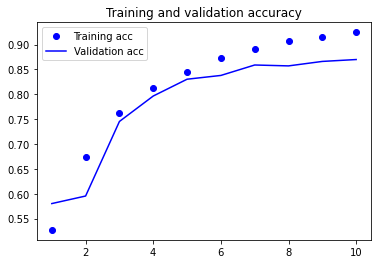

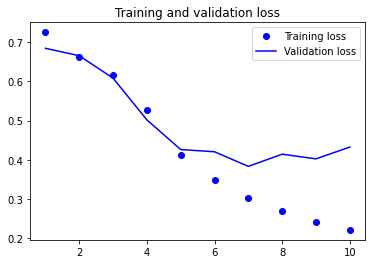

In [9]:
# Place plot here
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
img_file = results_dir.joinpath('Assignment_10.4_Model Accuracy Validation.png')
plt.savefig(img_file)
plt.show()

In [10]:
#save the model performance metrics and training and validation accuracy curves in the results/model_2 direc
model.load_weights(result_model_file)
eval = model.evaluate(x_test, y_test)
print("")
print(eval)


[0.46091146278381345, 0.85872]
